# **🏠 부동산 실거래가 Baseline code**
> 부동산 실거래가 예측 대회에 오신 여러분 환영합니다! 🎉     
> 아래 baseline에서는 RandomForest를 활용해 ML 방법론들을 실제 대회에 적용해보도록 하겠습니다.
> 강의는 google colab으로 실행하였기에 아래의 베이스라인 코드와는 일부 차이가 있을 수 있습니다. 

## Contents
- Library Import
- Data Load
- Data Preprocessing
- Feature Engineering
- Model Training
- Inference
- Output File Save


## 1. Library Import
- 필요한 라이브러리를 불러옵니다.

In [72]:
!pip install -r requirements.txt

     ---------------------------------------- 7.6/7.6 MB 13.9 MB/s eta 0:00:00
     --------------------------------------- 14.6/14.6 MB 15.2 MB/s eta 0:00:00
     --------------------------------------- 10.4/10.4 MB 16.8 MB/s eta 0:00:00
     --------------------------------------- 44.1/44.1 MB 13.3 MB/s eta 0:00:00
     -------------------------------------- 293.3/293.3 kB 9.1 MB/s eta 0:00:00
     ---------------------------------------- 8.3/8.3 MB 13.0 MB/s eta 0:00:00
     ---------------------------------------- 9.2/9.2 MB 19.6 MB/s eta 0:00:00
     ---------------------------------------- 78.3/78.3 kB 4.3 MB/s eta 0:00:00
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.64.1
    Uninstalling tqdm-4.64.1:
      Successfully uninstalled tqdm-4.64.1
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.0
    Uninstalling numpy-1.25.0:
      Successfully uninstalled numpy-1.25.0


ERROR: Could not install packages due to an OSError: [WinError 5] 액세스가 거부되었습니다: 'C:\\Users\\user\\AppData\\Local\\Temp\\pip-uninstall-vonyz0v3\\core\\_multiarray_tests.cp310-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [8]:
!pip install scikit-learn==0.24.1

     ---------------------------------------- 7.4/7.4 MB 9.1 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build scikit-learn


  error: subprocess-exited-with-error
  
  exit code: 1
  
  [56 lines of output]
  <string>:17: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  Partial import of sklearn during the build process.
  <string>:116: DeprecationWarning:
  
    `numpy.distutils` is deprecated since NumPy 1.23.0, as a result
    of the deprecation of `distutils` itself. It will be removed for
    Python >= 3.12. For older Python versions it will remain present.
    It is recommended to use `setuptools < 60.0` for those Python versions.
    For more details, see:
      https://numpy.org/devdocs/reference/distutils_status_migration.html
  
  
  INFO: No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
  Traceback (most recent call last):
    File "C:\Users\user\anaconda3\lib\site-packages\pip\_vendor\pep517\in_process\_in_process.py", line 351, in <module>
      main()
    File "C:\Users\user\anaconda

In [71]:
!pip install scikit-learn==0.24.1

  Using cached scikit-learn-0.24.1.tar.gz (7.4 MB)
  Installing build dependencies: started
  Installing build dependencies: still running...
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build scikit-learn


  error: subprocess-exited-with-error
  
  exit code: 1
  
  [1388 lines of output]
  <string>:17: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  Partial import of sklearn during the build process.
  <string>:116: DeprecationWarning:
  
    `numpy.distutils` is deprecated since NumPy 1.23.0, as a result
    of the deprecation of `distutils` itself. It will be removed for
    Python >= 3.12. For older Python versions it will remain present.
    It is recommended to use `setuptools < 60.0` for those Python versions.
    For more details, see:
      https://numpy.org/devdocs/reference/distutils_status_migration.html
  
  
  INFO: No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
  INFO: C:\Program Files (x86)\Microsoft Visual Studio\2022\BuildTools\VC\Tools\MSVC\14.39.33519\bin\HostX86\x64\cl.exe /c /nologo /O2 /W3 /GL /DNDEBUG /MD -IC:\Program Files (x86)\Microsoft Visual Stu

In [67]:
!pip show eli5

Name: eli5
Version: 0.13.0
Summary: Debug machine learning classifiers and explain their predictions
Home-page: https://github.com/eli5-org/eli5
Author: Mikhail Korobov, Konstantin Lopuhin
Author-email: kmike84@gmail.com, kostia.lopuhin@gmail.com
License: MIT license
Location: c:\users\user\anaconda3\lib\site-packages
Requires: attrs, graphviz, jinja2, numpy, scikit-learn, scipy, six, tabulate
Required-by: 


In [68]:
!pip install --upgrade eli5

In [1]:
# visualization
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
# fe = fm.FontEntry(
#     fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
#     name='NanumBarunGothic')                        # 이 폰트의 원하는 이름 설정
# fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
# plt.rcParams.update({'font.size': 10, 'font.family': 'NanumBarunGothic'}) # 폰트 설정
# plt.rc('font', family='NanumBarunGothic')
import seaborn as sns

# utils
import pandas as pd
import numpy as np
from tqdm import tqdm
import pickle
import warnings;warnings.filterwarnings('ignore')

# Model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# import eli5
# from eli5.sklearn import PermutationImportance

C:\Users\user\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Data Load

In [157]:
# 필요한 데이터를 load 하겠습니다. 경로는 환경에 맞게 지정해주면 됩니다.
train_path = 'train.csv'
test_path  = 'test.csv'
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

In [198]:
# Train data와 Test data shape은 아래와 같습니다.
print('Train data shape : ', train.shape, 'Test data shape : ', test.shape)

Train data shape :  (1118822, 53) Test data shape :  (9272, 52)


## 전처리: 결측치

In [159]:
# train/test 합치기 

train['is_test'] = 0
test['is_test'] = 1
concat = pd.concat([train, test])

In [160]:
# 칼럼별 value_counts 확인 

for col in concat.columns:
    print(col)
    display(concat[col].value_counts())
    
#>> 거래유형, 중개사소재지, 건축면적

시군구


시군구
서울특별시 노원구 상계동    45232
서울특별시 노원구 중계동    26524
서울특별시 양천구 신정동    23768
서울특별시 도봉구 창동     23222
서울특별시 구로구 구로동    22941
                 ...  
서울특별시 중구 필동1가        6
서울특별시 용산구 주성동        5
서울특별시 종로구 연지동        4
서울특별시 중구 입정동         3
서울특별시 마포구 구수동        3
Name: count, Length: 339, dtype: int64

번지


번지
13         4670
17         4600
10         4577
347        4291
481        4191
           ... 
792-20        1
752-42        1
8-27          1
90-13         1
1553-15       1
Name: count, Length: 6578, dtype: int64

본번


본번
30.0      7105
17.0      5538
13.0      5284
271.0     5015
1.0       4989
          ... 
4974.0       2
1200.0       2
2015.0       2
1486.0       1
2039.0       1
Name: count, Length: 1523, dtype: int64

부번


부번
0.0       827096
1.0        95543
2.0        28015
3.0        18100
5.0        14026
           ...  
174.0          2
340.0          2
516.0          1
233.0          1
1507.0         1
Name: count, Length: 329, dtype: int64

아파트명


아파트명
현대               16779
신동아              12929
한신                9128
두산                8593
주공2               7955
                 ...  
제니스뷰                 1
다온숲                  1
포렛빌                  1
DMC금호리첸시아            1
힐스테이트세운센트럴1단지        1
Name: count, Length: 6549, dtype: int64

전용면적(㎡)


전용면적(㎡)
84.9600     20593
84.9700     20093
84.9900     19491
84.9800     19238
59.9400     13974
            ...  
26.7200         1
59.9951         1
104.9880        1
123.0600        1
59.7446         1
Name: count, Length: 14670, dtype: int64

계약년월


계약년월
202006    16364
201503    15510
201808    14990
201707    14922
201705    14766
          ...  
202207      690
202211      646
202209      620
202210      576
201609      460
Name: count, Length: 201, dtype: int64

계약일


계약일
20    40236
15    39519
10    39404
13    38387
18    38217
11    38144
16    38083
25    37615
23    37579
22    37447
9     37444
27    37357
14    37325
12    37082
17    36841
7     36726
8     36655
28    36320
21    36310
19    36251
6     36052
1     36038
4     36029
24    35872
5     35799
26    35510
30    35022
3     34785
2     34758
29    34261
31    21026
Name: count, dtype: int64

층


층
 5     82748
 4     82633
 3     81089
 2     77575
 6     74215
 7     70857
 1     67545
 8     66775
 9     64894
 10    63062
 11    59709
 12    56806
 13    50127
 14    46237
 15    42273
 16    23407
 17    21817
 18    19452
 19    16169
 20    13384
 21     9505
 22     8305
 23     6701
 24     5251
 25     4020
 26     2324
 27     2033
 28     1571
 29     1204
 30      980
 31      748
 32      680
 33      575
 34      513
 35      445
 36      364
 37      240
-1       218
 38      206
 39      191
 40      137
 41      125
 42      114
 43      101
 46       89
 44       83
 45       79
 47       65
 48       52
 54       40
 49       37
 50       35
 51       35
-2        31
 53       27
 52       26
 58       20
 55       20
 57       15
 63       12
 59       11
 66       11
-3        11
 64       11
 62       10
 60        9
 56        8
 61        8
 68        6
 65        6
 67        6
-4         4
 69        2
Name: count, dtype: int64

건축년도


건축년도
2004    68919
2003    66039
1999    60262
2000    57250
1988    55953
2005    48648
1998    44325
2001    42574
1997    42531
2002    42174
2008    37540
2006    35168
1992    32792
1996    32341
1993    30694
2007    29929
1995    27218
1994    25902
1987    25781
2009    24260
1989    23829
1986    23494
2010    21178
2011    20480
2014    17433
2012    16555
1990    15800
1991    15336
1983    14293
2013    13559
1982    11800
1984    10671
1980     9820
2015     8965
2016     8558
1978     8128
1985     8097
1979     7069
1981     5225
2019     5195
2018     5106
2017     4869
1974     3444
2020     3084
1976     2665
1971     2407
1977     2329
1975     2187
2021     1951
1973     1049
2022      761
1970      689
1972      685
1969      537
1968      253
1966      105
2023       99
1961       55
1967       17
1965       17
Name: count, dtype: int64

도로명


도로명
올림픽로 435      4372
솔샘로 174       4049
송파대로 345      3668
성북로4길 52      3519
양재대로 1340     3369
              ... 
한강대로62길 18       1
광나루로39길 11       1
 20-3            1
곰달래로 60-1        1
을지로15길 31        1
Name: count, Length: 9245, dtype: int64

해제사유발생일


해제사유발생일
20220211.0    151
20200727.0     43
20200714.0     40
20200720.0     37
20200715.0     32
             ... 
20230722.0      1
20221119.0      1
20220802.0      1
20220722.0      1
20230909.0      1
Name: count, Length: 1033, dtype: int64

등기신청일자


등기신청일자
            1111271
20230630        585
20230831        496
20230428        394
20230731        374
             ...   
20230105          3
20230125          3
20230109          1
20230102          1
20230104          1
Name: count, Length: 182, dtype: int64

거래유형


거래유형
-       1086451
중개거래      38123
직거래        3520
Name: count, dtype: int64

중개사소재지


중개사소재지
-                    1090013
서울 노원구                  2627
서울 송파구                  2540
서울 강남구                  2508
서울 강동구                  2038
                      ...   
서울 강북구, 서울 양천구             1
경기 남양주시, 경기 성남수정구          1
서울 송파구, 인천 계양구             1
경기 연천군, 서울 송파구             1
서울 중랑구, 인천 부평구             1
Name: count, Length: 739, dtype: int64

k-단지분류(아파트,주상복합등등)


k-단지분류(아파트,주상복합등등)
아파트               238586
주상복합               11450
도시형 생활주택(주상복합)       505
도시형 생활주택(아파트)        155
연립주택                 125
Name: count, dtype: int64

k-전화번호


k-전화번호
024162883      3068
02-575-5024    2816
024046006      2605
025677608      2515
023743863      2385
               ... 
226662806.0       1
29748290.0        1
25147022.0        1
024524500         1
0222099040        1
Name: count, Length: 1082, dtype: int64

k-팩스번호


k-팩스번호
02-572-3212    2816
24162280.0     2470
025613140      2425
29797224.0     2378
25334075.0     2321
               ... 
220689972.0       1
0222099041        1
028130449         1
024524533         1
025861159         1
Name: count, Length: 1385, dtype: int64

단지소개기존clob


단지소개기존clob
4.0       24034
1474.0     2480
638.0      2366
301.0      2119
2315.0     1572
144.0      1513
297.0      1504
1269.0     1060
1208.0     1041
2162.0     1036
2126.0     1018
725.0      1010
277.0       940
62.0        921
219.0       833
70.0        818
2000.0      759
1031.0      691
23.0        676
460.0       671
413.0       666
308.0       638
2351.0      632
276.0       615
787.0       593
2304.0      589
68.0        561
2262.0      555
364.0       523
28.0        518
64.0        491
2168.0      477
317.0       474
280.0       466
1346.0      458
531.0       449
789.0       399
104.0       389
465.0       382
5.0         372
464.0       369
491.0       367
1212.0      367
2048.0      363
179.0       358
143.0       335
122.0       328
119.0       322
45.0        316
93.0        315
113.0       307
221.0       304
2269.0      297
2034.0      289
241.0       284
526.0       279
197.0       277
375.0       263
625.0       258
2196.0      250
2038.0      249
878.0       2

k-세대타입(분양형태)


k-세대타입(분양형태)
분양    208098
기타     41638
임대      2233
Name: count, dtype: int64

k-관리방식


k-관리방식
위탁관리    230361
자치관리     18144
직영        3464
Name: count, dtype: int64

k-복도유형


k-복도유형
계단식    124964
혼합식     85513
복도식     38710
타워형      1371
기타       1082
Name: count, dtype: int64

k-난방방식


k-난방방식
개별난방    152365
지역난방     84826
중앙난방     12687
기타        2091
Name: count, dtype: int64

k-전체동수


k-전체동수
10.0     20021
2.0      17300
6.0      16357
3.0      15418
4.0      13336
1.0      12437
7.0      11874
5.0      11864
9.0      10930
8.0      10775
14.0      9892
15.0      9019
11.0      8126
12.0      7802
28.0      7649
13.0      7089
19.0      6635
16.0      4709
22.0      4249
31.0      4009
32.0      3878
23.0      3248
72.0      3068
124.0     2816
30.0      2623
56.0      2605
20.0      2486
33.0      2385
44.0      2366
34.0      2208
17.0      1708
24.0      1705
18.0      1617
51.0      1513
40.0      1504
21.0      1382
50.0      1370
37.0      1028
26.0       823
84.0       549
41.0       514
Name: count, dtype: int64

k-전체세대수


k-전체세대수
5678.0    3068
5040.0    2816
4494.0    2605
4424.0    2592
2433.0    2480
          ... 
494.0        2
514.0        2
614.0        2
243.0        1
1395.0       1
Name: count, Length: 522, dtype: int64

k-건설사(시공사)


k-건설사(시공사)
삼성물산         14259
대우건설         11549
현대건설         10575
대한주택공사        7665
GS건설          7015
             ...  
두산               5
신영건설             3
자이에스앤디(주)        2
혜림건설             1
삼익건설(주)          1
Name: count, Length: 344, dtype: int64

k-시행사


k-시행사
SH공사              12604
대한주택공사             7784
도시개발공사             4284
sh공사               4194
재건축조합              4065
                  ...  
(주)에스떠블유산업개발          2
청명종합건설(주)             2
사당3주택재건축정비사업조합        2
개포우성9차모델링조합           2
한호건설(주)               2
Name: count, Length: 556, dtype: int64

k-사용검사일-사용승인일


k-사용검사일-사용승인일
1992-11-18 00:00:00.0    3297
2008-09-30 00:00:00.0    3068
1990-09-06 00:00:00.0    2861
1982-06-04 00:00:00.0    2816
2005-12-28 00:00:00.0    2644
                         ... 
2022-07-28 00:00:00.0       2
2021-12-01 00:00:00.0       2
2023-01-16 00:00:00.0       2
2023-01-27 00:00:00.0       1
1994-12-07 00:00:00.0       1
Name: count, Length: 674, dtype: int64

k-연면적


k-연면적
935380.0    3068
240629.0    2816
667132.0    2605
504698.0    2592
172371.0    2480
            ... 
80835.0        2
44951.0        2
51129.0        2
33807.0        1
60621.0        1
Name: count, Length: 735, dtype: int64

k-주거전용면적


k-주거전용면적
470140.0    3068
242461.0    2816
537573.0    2605
353089.0    2592
117086.0    2480
            ... 
38716.0        2
24878.0        2
18236.0        2
22782.0        1
37677.0        1
Name: count, Length: 740, dtype: int64

k-관리비부과면적


k-관리비부과면적
618666.0    3068
240629.0    2816
646257.0    2605
470732.0    2592
166985.0    2480
            ... 
50194.0        2
31174.0        2
18237.0        2
22782.0        1
57799.0        1
Name: count, Length: 736, dtype: int64

k-전용면적별세대현황(60㎡이하)


k-전용면적별세대현황(60㎡이하)
0.0       54234
1150.0     3068
370.0      2893
4975.0     2816
750.0      2744
          ...  
543.0         5
438.0         2
614.0         2
9.0           1
1395.0        1
Name: count, Length: 349, dtype: int64

k-전용면적별세대현황(60㎡~85㎡이하)


k-전용면적별세대현황(60㎡~85㎡이하)
0.0       43342
688.0      3306
4042.0     3068
65.0       2971
1500.0     2605
          ...  
465.0         7
25.0          7
850.0         6
273.0         5
333.0         2
Name: count, Length: 387, dtype: int64

k-85㎡~135㎡이하


k-85㎡~135㎡이하
0.0      100377
90.0       3254
486.0      3068
900.0      2605
456.0      2573
          ...  
9.0          38
487.0        22
220.0        15
2.0          12
494.0         2
Name: count, Length: 244, dtype: int64

k-135㎡초과


k-135㎡초과
70.0    329
Name: count, dtype: int64

k-홈페이지


k-홈페이지
없음                                                        3628
www.jsls.co.kr                                            3068
gaepo001@naver.com                                        2816
www.oftapt.com                                            2605
성산시영.apt.co.kr                                            2385
                                                          ... 
bbgran.xisad.co.kr                                           7
www. 자양12구역지역재개발조합                                           7
cafe.naver.com                                               6
thesharp-trieh.hthomeservice.com/#/feeManage?_k=vm58ep       2
http://www.i-sh.co.kr/happy/intro.do                         1
Name: count, Length: 221, dtype: int64

k-등록일자


k-등록일자
2017-02-01 10:49:21.0    1875
2017-02-10 12:21:22.0     736
2019-01-03 07:03:23.0     549
2017-04-18 02:58:24.0     317
2017-09-06 06:35:46.0     245
                         ... 
2021-11-10 10:27:07.0       2
2021-10-09 20:49:45.0       2
2022-01-05 18:02:23.0       2
2023-03-06 22:40:25.0       2
2023-02-18 07:24:46.0       1
Name: count, Length: 127, dtype: int64

k-수정일자


k-수정일자
2023-09-20 21:38:55.0    3068
2020-02-17 06:10:24.0    2816
2023-09-20 22:10:18.0    2605
2023-09-23 17:49:17.0    2592
2023-09-25 09:18:00.0    2480
                         ... 
2023-09-25 18:02:22.0       2
2023-09-23 17:23:08.0       2
2023-09-26 04:36:00.0       2
2023-09-23 08:21:37.0       1
2023-09-25 07:49:22.0       1
Name: count, Length: 744, dtype: int64

고용보험관리번호


고용보험관리번호
909-01-23103-1    3068
21380014370       2816
908-00-99517-1    2592
907-009-67911     2480
907-00-16928-1    2385
                  ... 
92023031541         28
91919837281         20
918-15-59912-1      15
206-82-61203-0       3
21780016330          1
Name: count, Length: 526, dtype: int64

경비비관리형태


경비비관리형태
위탁       208757
직영        33791
위탁+직영      6168
기타         1817
Name: count, dtype: int64

세대전기계약방법


세대전기계약방법
종합계약    124610
단일계약    118095
Name: count, dtype: int64

청소비관리형태


청소비관리형태
위탁       227511
직영        15174
위탁+직영      4179
기타         3479
Name: count, dtype: int64

건축면적


건축면적
0.00         118394
49266.41       2605
172371.00      2480
25737.00       2366
20457.82       2208
              ...  
6135.89           2
6171.68           2
2724.46           2
6329.59           2
2909.14           1
Name: count, Length: 455, dtype: int64

주차대수


주차대수
0.0       18141
2.0        3415
1.0        2864
4245.0     2605
3021.0     2592
          ...  
657.0         2
984.0         2
915.0         2
305.0         2
363.0         1
Name: count, Length: 526, dtype: int64

기타/의무/임대/임의=1/2/3/4


기타/의무/임대/임의=1/2/3/4
의무    241849
기타      4186
임의      3701
임대      2233
Name: count, dtype: int64

단지승인일


단지승인일
2013-06-23 12:47:34.0    3068
2013-06-23 14:21:02.0    2816
2015-01-12 11:06:54.0    2605
2017-04-12 17:26:04.0    2592
2019-01-03 16:13:52.0    2480
                         ... 
2021-12-01 11:18:38.0       2
2022-02-23 13:01:10.0       2
2023-07-21 14:14:45.0       2
2023-04-27 13:23:51.0       1
2016-05-27 17:03:25.0       1
Name: count, Length: 736, dtype: int64

사용허가여부


사용허가여부
Y    251969
Name: count, dtype: int64

관리비 업로드


관리비 업로드
N    247788
Y      4181
Name: count, dtype: int64

좌표X


좌표X
127.088451    3068
127.058521    2816
127.114376    2605
127.065070    2592
127.066569    2480
              ... 
126.904871       2
127.144876       2
126.996600       2
127.095752       1
127.070158       1
Name: count, Length: 742, dtype: int64

좌표Y


좌표Y
37.512752    3068
37.480002    2816
37.488521    2605
37.497741    2592
37.642724    2480
             ... 
37.488308       2
37.483848       2
37.564541       2
37.585561       1
37.630117       1
Name: count, Length: 742, dtype: int64

단지신청일


단지신청일
2013-03-07 09:46:18.0    16583
2013-03-07 09:46:36.0    11887
2013-03-07 09:46:19.0    11670
2013-03-07 09:46:42.0     7973
2013-03-07 09:46:20.0     7624
                         ...  
2022-12-12 11:52:27.0        2
2021-12-01 11:09:41.0        2
2022-02-23 11:05:05.0        2
2023-07-21 14:11:01.0        2
2023-04-27 13:20:30.0        1
Name: count, Length: 260, dtype: int64

target


target
60000.0     11685
40000.0     10611
30000.0     10046
35000.0      9595
50000.0      9393
            ...  
22175.0         1
131639.0        1
90579.0         1
97414.0         1
20670.0         1
Name: count, Length: 14530, dtype: int64

is_test


is_test
0    1118822
1       9272
Name: count, dtype: int64

In [161]:
concat['등기신청일자'] = concat['등기신청일자'].replace(' ', np.nan)
concat['거래유형'] = concat['거래유형'].replace('-', np.nan)
concat['중개사소재지'] = concat['중개사소재지'].replace('-', np.nan)

In [162]:
# 칼럼별 결측치 비율 

missing_values = concat.isnull().sum()  # 칼럼별 결측치 수 

total_rows = concat.shape[0]  # 전체 행 수 

missing_ratio = (missing_values / total_rows) * 100

missing_ratio_sorted = missing_ratio.sort_values(ascending=False)

missing_ratio_df = pd.DataFrame({'Missing Ratio (%)': missing_ratio_sorted})

missing_ratio_df

,Missing Ratio (%)
k-135㎡초과,99.970836
해제사유발생일,99.450844
k-등록일자,98.962143
등기신청일자,98.508724
중개사소재지,96.624306
거래유형,96.308552
단지소개기존clob,93.871433
k-홈페이지,89.843843
고용보험관리번호,81.620592
세대전기계약방법,78.485392


In [163]:
concat['k-135㎡초과'].value_counts()

k-135㎡초과
70.0    329
Name: count, dtype: int64

In [164]:
# 본번, 부번의 경우 float로 되어있지만 범주형 변수의 의미를 가지므로 object(string) 형태로 바꾸어주고 아래 작업을 진행하겠습니다.
concat['본번'] = concat['본번'].astype('str')
concat['부번'] = concat['부번'].astype('str')

In [165]:
continuous_columns = []
categorical_columns = []

for column in concat.columns:
    if pd.api.types.is_numeric_dtype(concat[column]):
        continuous_columns.append(column)
    else:
        categorical_columns.append(column)

print("연속형 변수:", continuous_columns)
print("\n범주형 변수:", categorical_columns)

연속형 변수: ['전용면적(㎡)', '계약년월', '계약일', '층', '건축년도', '해제사유발생일', '단지소개기존clob', 'k-전체동수', 'k-전체세대수', 'k-연면적', 'k-주거전용면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60㎡이하)', 'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하', 'k-135㎡초과', '건축면적', '주차대수', '좌표X', '좌표Y', 'target', 'is_test']

범주형 변수: ['시군구', '번지', '본번', '부번', '아파트명', '도로명', '등기신청일자', '거래유형', '중개사소재지', 'k-단지분류(아파트,주상복합등등)', 'k-전화번호', 'k-팩스번호', 'k-세대타입(분양형태)', 'k-관리방식', 'k-복도유형', 'k-난방방식', 'k-건설사(시공사)', 'k-시행사', 'k-사용검사일-사용승인일', 'k-홈페이지', 'k-등록일자', 'k-수정일자', '고용보험관리번호', '경비비관리형태', '세대전기계약방법', '청소비관리형태', '기타/의무/임대/임의=1/2/3/4', '단지승인일', '사용허가여부', '관리비 업로드', '단지신청일']


<Axes: >

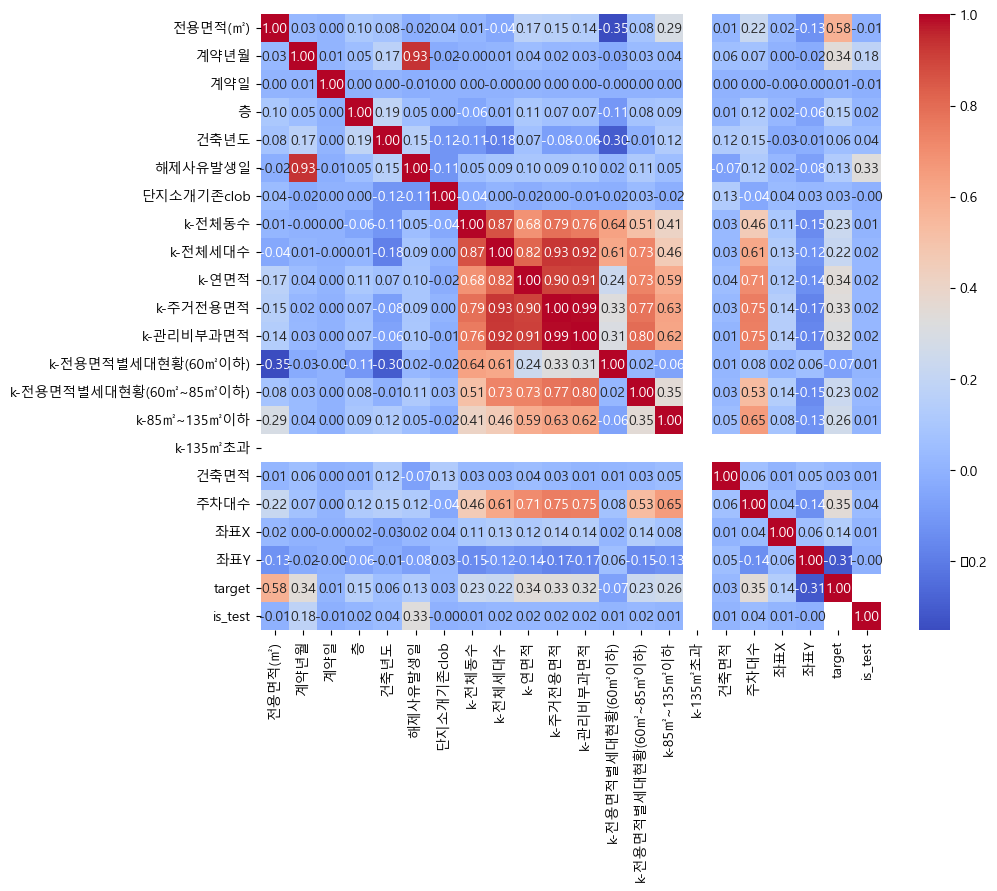

In [166]:
concat_continuous = concat[continuous_columns]
correlation = concat_continuous.corr()

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")

In [167]:
# 결측치 90% 이상 칼럼 제거 
over_90_na_ratio_col = missing_ratio_df[missing_ratio_df['Missing Ratio (%)'] >= 90].index
concat = concat.drop(columns=over_90_na_ratio_col)

In [168]:
# 불필요해보이는 칼럼 제거 
cols_to_drop = ['k-홈페이지', '고용보험관리번호', 'k-팩스번호', 'k-전화번호' ]
concat = concat.drop(columns=cols_to_drop)

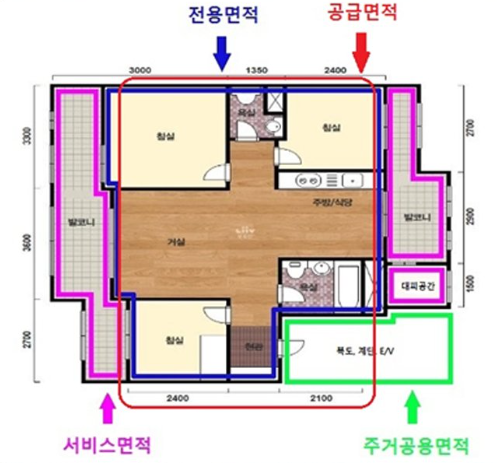

In [169]:
# 면적 관련 칼럼
concat[['건축면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60㎡이하)', 'k-85㎡~135㎡이하', 'k-주거전용면적', 'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-연면적', '전용면적(㎡)']]
#>> '건축면적': 건물의 1층 바닥 넓이 
#>> '연면적': 건물의 모든 층의 면적을 합한 넓이 

,건축면적,k-관리비부과면적,k-전용면적별세대현황(60㎡이하),k-85㎡~135㎡이하,k-주거전용면적,k-전용면적별세대현황(60㎡~85㎡이하),k-연면적,전용면적(㎡)
0,4858.0,22637.0,20.0,0.0,20204.0,250.0,22637.0,79.97
1,4858.0,22637.0,20.0,0.0,20204.0,250.0,22637.0,79.97
2,4858.0,22637.0,20.0,0.0,20204.0,250.0,22637.0,54.98
3,4858.0,22637.0,20.0,0.0,20204.0,250.0,22637.0,79.97
4,4858.0,22637.0,20.0,0.0,20204.0,250.0,22637.0,79.97
...,...,...,...,...,...,...,...,...
9267,14171.0,92808.0,808.0,90.0,93849.0,504.0,190866.0,84.65
9268,14171.0,92808.0,808.0,90.0,93849.0,504.0,190866.0,84.62
9269,14171.0,92808.0,808.0,90.0,93849.0,504.0,190866.0,101.65
9270,14171.0,92808.0,808.0,90.0,93849.0,504.0,190866.0,84.94


In [170]:
# 면적 관련 칼럼 drop: '전용면적(㎡)', 'k-연면적'만 남기고 제거 
area_to_drop = ['건축면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60㎡이하)', 'k-85㎡~135㎡이하', 'k-주거전용면적', 'k-전용면적별세대현황(60㎡~85㎡이하)']
concat = concat.drop(columns=area_to_drop)

In [171]:
# 일자 관련 칼럼
concat[['단지신청일', '단지승인일', 'k-사용검사일-사용승인일', 'k-수정일자', '건축년도', '계약일', '계약년월']]
#>> 'k-수정일자': 불필요 
#>> 'k-사용검사일-사용승인일'(결측치 78%): '건축년도'(결측치 0%)로 대체가능 
#>> '단지신청일': '단지승인일'로 대체
#>> '계약일': 불필요 

,단지신청일,단지승인일,k-사용검사일-사용승인일,k-수정일자,건축년도,계약일,계약년월
0,2022-11-17 10:19:06.0,2022-11-17 13:00:29.0,1987-11-21 00:00:00.0,2023-09-23 17:21:41.0,1987,8,201712
1,2022-11-17 10:19:06.0,2022-11-17 13:00:29.0,1987-11-21 00:00:00.0,2023-09-23 17:21:41.0,1987,22,201712
2,2022-11-17 10:19:06.0,2022-11-17 13:00:29.0,1987-11-21 00:00:00.0,2023-09-23 17:21:41.0,1987,28,201712
3,2022-11-17 10:19:06.0,2022-11-17 13:00:29.0,1987-11-21 00:00:00.0,2023-09-23 17:21:41.0,1987,3,201801
4,2022-11-17 10:19:06.0,2022-11-17 13:00:29.0,1987-11-21 00:00:00.0,2023-09-23 17:21:41.0,1987,8,201801
...,...,...,...,...,...,...,...
9267,2014-09-01 13:05:03.0,2015-09-09 15:30:27.0,2014-06-18 00:00:00.0,2023-09-23 09:00:52.0,2014,19,202307
9268,2014-09-01 13:05:03.0,2015-09-09 15:30:27.0,2014-06-18 00:00:00.0,2023-09-23 09:00:52.0,2014,25,202307
9269,2014-09-01 13:05:03.0,2015-09-09 15:30:27.0,2014-06-18 00:00:00.0,2023-09-23 09:00:52.0,2014,27,202308
9270,2014-09-01 13:05:03.0,2015-09-09 15:30:27.0,2014-06-18 00:00:00.0,2023-09-23 09:00:52.0,2014,2,202309


In [172]:
# 일자 관련 칼럼 drop: 'k-수정일자', 'k-사용검사일-사용승인일', '단지신청일', '계약일' 제거 
date_to_drop = ['k-수정일자', 'k-사용검사일-사용승인일', '단지신청일', '계약일']
concat = concat.drop(columns=date_to_drop)

In [173]:
# 위치 관련 칼럼 
concat[['좌표X', '좌표Y', '시군구', '번지', '부번', '본번', '도로명']]

,좌표X,좌표Y,시군구,번지,부번,본번,도로명
0,127.05721,37.476763,서울특별시 강남구 개포동,658-1,1.0,658.0,언주로 3
1,127.05721,37.476763,서울특별시 강남구 개포동,658-1,1.0,658.0,언주로 3
2,127.05721,37.476763,서울특별시 강남구 개포동,658-1,1.0,658.0,언주로 3
3,127.05721,37.476763,서울특별시 강남구 개포동,658-1,1.0,658.0,언주로 3
4,127.05721,37.476763,서울특별시 강남구 개포동,658-1,1.0,658.0,언주로 3
...,...,...,...,...,...,...,...
9267,127.10672,37.618870,서울특별시 중랑구 신내동,816,0.0,816.0,신내역로1길 85
9268,127.10672,37.618870,서울특별시 중랑구 신내동,816,0.0,816.0,신내역로1길 85
9269,127.10672,37.618870,서울특별시 중랑구 신내동,816,0.0,816.0,신내역로1길 85
9270,127.10672,37.618870,서울특별시 중랑구 신내동,816,0.0,816.0,신내역로1길 85


In [174]:
# 위치 관련 칼럼 drop: '좌표X', '좌표Y' (결측치 78%로 번지, 부번, 본번으로 대체)
location_to_drop = ['좌표X', '좌표Y']
concat = concat.drop(columns=location_to_drop)

In [175]:
concat['시군구'].str.split().str[0].value_counts()
#>> 서울시만 있다 

시군구
서울특별시    1128094
Name: count, dtype: int64

In [176]:
# 시군구, 년월 등 분할할 수 있는 변수들은 세부사항 고려를 용이하게 하기 위해 모두 분할해 주겠습니다.
concat['구'] = concat['시군구'].map(lambda x : x.split()[1])
concat['동'] = concat['시군구'].map(lambda x : x.split()[2])
del concat['시군구']

concat['계약년'] = concat['계약년월'].astype('str').map(lambda x : x[:4])
concat['계약월'] = concat['계약년월'].astype('str').map(lambda x : x[4:])
del concat['계약년월']

In [177]:
concat.head()

,번지,본번,부번,아파트명,전용면적(㎡),층,건축년도,도로명,"k-단지분류(아파트,주상복합등등)",k-세대타입(분양형태),...,기타/의무/임대/임의=1/2/3/4,단지승인일,사용허가여부,관리비 업로드,target,is_test,구,동,계약년,계약월
0,658-1,658.0,1.0,개포6차우성,79.97,3,1987,언주로 3,아파트,분양,...,임의,2022-11-17 13:00:29.0,Y,N,124000.0,0,강남구,개포동,2017,12
1,658-1,658.0,1.0,개포6차우성,79.97,4,1987,언주로 3,아파트,분양,...,임의,2022-11-17 13:00:29.0,Y,N,123500.0,0,강남구,개포동,2017,12
2,658-1,658.0,1.0,개포6차우성,54.98,5,1987,언주로 3,아파트,분양,...,임의,2022-11-17 13:00:29.0,Y,N,91500.0,0,강남구,개포동,2017,12
3,658-1,658.0,1.0,개포6차우성,79.97,4,1987,언주로 3,아파트,분양,...,임의,2022-11-17 13:00:29.0,Y,N,130000.0,0,강남구,개포동,2018,01
4,658-1,658.0,1.0,개포6차우성,79.97,2,1987,언주로 3,아파트,분양,...,임의,2022-11-17 13:00:29.0,Y,N,117000.0,0,강남구,개포동,2018,01


In [178]:
pd.set_option('display.max_rows', 100)
concat[['k-관리방식', 'k-전체세대수','전용면적(㎡)', '주차대수', '아파트명']]

,k-관리방식,k-전체세대수,전용면적(㎡),주차대수,아파트명
0,자치관리,270.0,79.97,262.0,개포6차우성
1,자치관리,270.0,79.97,262.0,개포6차우성
2,자치관리,270.0,54.98,262.0,개포6차우성
3,자치관리,270.0,79.97,262.0,개포6차우성
4,자치관리,270.0,79.97,262.0,개포6차우성
...,...,...,...,...,...
9267,위탁관리,1402.0,84.65,1568.0,신내우디안1단지
9268,위탁관리,1402.0,84.62,1568.0,신내우디안1단지
9269,위탁관리,1402.0,101.65,1568.0,신내우디안1단지
9270,위탁관리,1402.0,84.94,1568.0,신내우디안1단지


In [179]:
# 이상치 제거 방법에는 IQR을 이용하겠습니다.
def remove_outliers_iqr(dt, column_name):
    df = dt.query('is_test == 0')       # train data 내에 있는 이상치만 제거하도록 하겠습니다.
    df_test = dt.query('is_test == 1')

    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

    result = pd.concat([df, df_test])   # test data와 다시 합쳐주겠습니다.
    return result

In [180]:
# 위 방법으로 전용 면적에 대한 이상치를 제거해보겠습니다.
concat = remove_outliers_iqr(concat, '전용면적(㎡)')

In [181]:
# 먼저, 연속형 변수와 범주형 변수를 위 info에 따라 분리해주겠습니다.
continuous_columns = []
categorical_columns = []

for column in concat.columns:
    if pd.api.types.is_numeric_dtype(concat[column]):
        continuous_columns.append(column)
    else:
        categorical_columns.append(column)

print("연속형 변수:", continuous_columns)
print("범주형 변수:", categorical_columns)

연속형 변수: ['전용면적(㎡)', '층', '건축년도', 'k-전체동수', 'k-전체세대수', 'k-연면적', '주차대수', 'target', 'is_test']
범주형 변수: ['번지', '본번', '부번', '아파트명', '도로명', 'k-단지분류(아파트,주상복합등등)', 'k-세대타입(분양형태)', 'k-관리방식', 'k-복도유형', 'k-난방방식', 'k-건설사(시공사)', 'k-시행사', '경비비관리형태', '세대전기계약방법', '청소비관리형태', '기타/의무/임대/임의=1/2/3/4', '단지승인일', '사용허가여부', '관리비 업로드', '구', '동', '계약년', '계약월']


In [182]:
# 범주형 변수에 대한 보간
concat[categorical_columns] = concat[categorical_columns].fillna('NULL')

# 연속형 변수에 대한 보간 (선형 보간)
concat[continuous_columns] = concat[continuous_columns].interpolate(method='linear', axis=0)

# Model Training

In [183]:
# 이제 다시 train과 test dataset을 분할해줍니다. 위에서 제작해 놓았던 is_test 칼럼을 이용합니다.
dt_train = concat.query('is_test==0')
dt_test = concat.query('is_test==1')

# 이제 is_test 칼럼은 drop해줍니다.
dt_train.drop(['is_test'], axis = 1, inplace=True)
dt_test.drop(['is_test'], axis = 1, inplace=True)
print(dt_train.shape, dt_test.shape)

(1029574, 31) (9272, 31)


In [184]:
# dt_test의 target은 일단 0으로 임의로 채워주도록 하겠습니다.
dt_test['target'] = 0

In [185]:
# 파생변수 제작으로 추가된 변수들이 존재하기에, 다시한번 연속형과 범주형 칼럼을 분리해주겠습니다.
continuous_columns_v2 = []
categorical_columns_v2 = []

for column in dt_train.columns:
    if pd.api.types.is_numeric_dtype(dt_train[column]):
        continuous_columns_v2.append(column)
    else:
        categorical_columns_v2.append(column)

print("연속형 변수:", continuous_columns_v2)
print("범주형 변수:", categorical_columns_v2)

연속형 변수: ['전용면적(㎡)', '층', '건축년도', 'k-전체동수', 'k-전체세대수', 'k-연면적', '주차대수', 'target']
범주형 변수: ['번지', '본번', '부번', '아파트명', '도로명', 'k-단지분류(아파트,주상복합등등)', 'k-세대타입(분양형태)', 'k-관리방식', 'k-복도유형', 'k-난방방식', 'k-건설사(시공사)', 'k-시행사', '경비비관리형태', '세대전기계약방법', '청소비관리형태', '기타/의무/임대/임의=1/2/3/4', '단지승인일', '사용허가여부', '관리비 업로드', '구', '동', '계약년', '계약월']


In [186]:
# 아래에서 범주형 변수들을 대상으로 레이블인코딩을 진행해 주겠습니다.

# 각 변수에 대한 LabelEncoder를 저장할 딕셔너리
label_encoders = {}

# Implement Label Encoding
for col in tqdm( categorical_columns_v2 ):
    lbl = LabelEncoder()

    # Label-Encoding을 fit
    lbl.fit( dt_train[col].astype(str) )
    dt_train[col] = lbl.transform(dt_train[col].astype(str))
    label_encoders[col] = lbl           # 나중에 후처리를 위해 레이블인코더를 저장해주겠습니다.

    # Test 데이터에만 존재하는 새로 출현한 데이터를 신규 클래스로 추가해줍니다.
    for label in np.unique(dt_test[col]):
      if label not in lbl.classes_: # unseen label 데이터인 경우
        lbl.classes_ = np.append(lbl.classes_, label) # 미처리 시 ValueError발생하니 주의하세요!

    dt_test[col] = lbl.transform(dt_test[col].astype(str))

100%|██████████████████████████████████████████████████████████████████████████████████| 23/23 [00:07<00:00,  3.00it/s]


In [187]:
assert dt_train.shape[1] == dt_test.shape[1]          # train/test dataset의 shape이 같은지 확인해주겠습니다.

In [188]:
# Target과 독립변수들을 분리해줍니다.
y_train = dt_train['target']
X_train = dt_train.drop(['target'], axis=1)

# Hold out split을 사용해 학습 데이터와 검증 데이터를 8:2 비율로 나누겠습니다.
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=2023)

In [189]:
# XGB Regressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=1)
model.fit(X_train, y_train)
pred = model.predict(X_val)

In [190]:
# 평가
mse = mean_squared_error(y_val, pred)
rmse = np.sqrt(mse)
rmse

10303.226505142915

<Axes: title={'center': 'Feature Importances'}, xlabel='None', ylabel='None'>

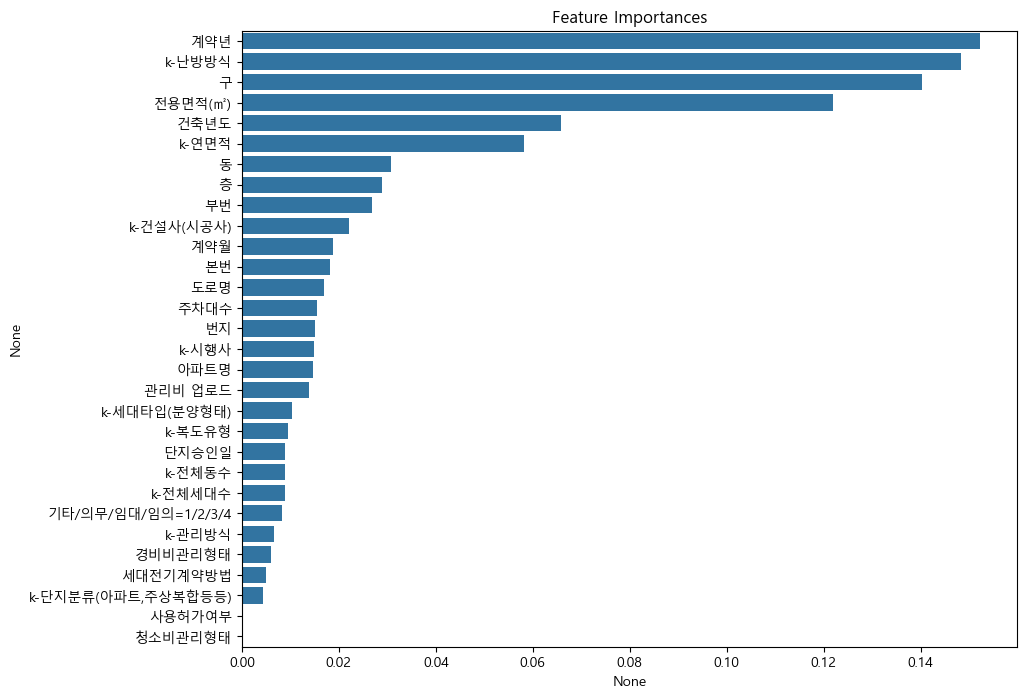

In [191]:
importances = pd.Series(model.feature_importances_, index=list(X_train.columns))
importances = importances.sort_values(ascending=False)

plt.figure(figsize=(10,8))
plt.title("Feature Importances")
sns.barplot(x=importances, y=importances.index)

In [192]:
# 학습된 모델을 저장합니다. Pickle 라이브러리를 이용하겠습니다.
with open('saved_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [193]:
dt_test.head(2)

,번지,본번,부번,아파트명,전용면적(㎡),층,건축년도,도로명,"k-단지분류(아파트,주상복합등등)",k-세대타입(분양형태),...,주차대수,기타/의무/임대/임의=1/2/3/4,단지승인일,사용허가여부,관리비 업로드,target,구,동,계약년,계약월
0,4282,1114,1,293,79.9700,5,1987,5520,3,2,...,262.0,4,703,1,0,0,0,8,16,6
1,4258,1107,1,294,108.2017,10,2021,431,3,2,...,305.0,2,699,1,0,0,0,8,16,7


In [194]:
# 저장된 모델을 불러옵니다.
with open('saved_model.pkl', 'rb') as f:
    model = pickle.load(f)

In [195]:
%%time
X_test = dt_test.drop(['target'], axis=1)

# Test dataset에 대한 inference를 진행합니다.
real_test_pred = model.predict(X_test)

CPU times: total: 46.9 ms
Wall time: 21 ms


In [196]:
real_test_pred       

array([176251.25 , 284432.47 , 272380.4  , ..., 109400.984,  99694.75 ,
        84451.11 ], dtype=float32)

In [197]:
# 앞서 예측한 예측값들을 저장합니다.
preds_df = pd.DataFrame(real_test_pred.astype(int), columns=["target"])
preds_df.to_csv('output.csv', index=False)